In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
buil_owner=pd.read_csv('Building_Ownership_Use.csv')
structure=pd.read_csv('Building_Structure.csv')

In [3]:
train.shape

(631761, 14)

In [4]:
test.shape

(421175, 13)

In [5]:
buil_owner.shape

(1052948, 17)

In [6]:
structure.shape

(1052948, 29)

In [7]:
structure.columns.tolist()

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'condition_post_eq']

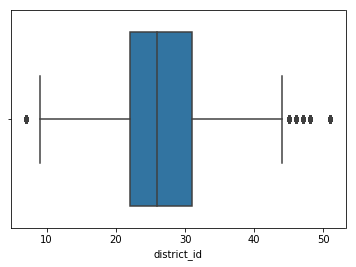

In [8]:
sns.boxplot(x=structure.district_id)

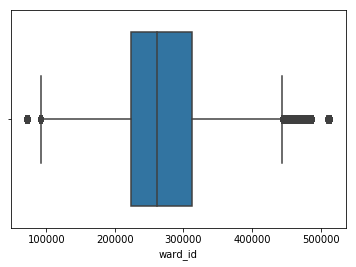

In [9]:
sns.boxplot(x=structure.ward_id)

In [10]:
structure.vdcmun_id.describe()

count    1.052948e+06
mean     2.711085e+03
std      7.780597e+02
min      7.010000e+02
25%      2.241000e+03
50%      2.612000e+03
75%      3.118000e+03
max      5.142000e+03
Name: vdcmun_id, dtype: float64

In [11]:
structure.count_floors_pre_eq.value_counts()

2    632969
3    225046
1    162594
4     22263
5      9102
6       814
7       128
8        18
9        14
Name: count_floors_pre_eq, dtype: int64

In [12]:
structure.count_floors_post_eq.describe()

count    1.052948e+06
mean     1.335681e+00
std      1.097744e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: count_floors_post_eq, dtype: float64

In [13]:
structure.loc[structure.count_floors_pre_eq==8]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
206453,26030de790d,26,2612,261216,8,8,6,5220,80,80,...,0,0,0,0,0,0,0,1,0,Damaged-Repaired and used
214307,27595f3e559,27,2704,270405,8,8,3,2000,72,72,...,0,1,1,1,0,0,0,1,0,Not damaged
235157,27be8ced94d,27,2731,273121,8,8,7,160,64,64,...,0,0,0,0,0,0,0,1,0,Damaged-Used in risk
235203,27be8cee9ae,27,2731,273121,8,8,9,264,72,72,...,0,0,0,0,0,0,0,1,0,Damaged-Not used
235417,27be8cf33e8,27,2731,273121,8,8,6,153,64,64,...,0,0,0,0,0,0,0,1,0,Damaged-Used in risk
235443,27be8cf3c91,27,2731,273121,8,8,4,525,48,48,...,0,0,0,0,0,0,0,1,0,Not damaged
353600,1d77c994b6f,20,2025,202502,8,8,8,360,24,24,...,0,0,0,1,0,0,0,1,0,Not damaged
458266,201293ef85c,22,2204,220401,8,8,14,700,75,75,...,0,0,0,0,0,0,1,0,0,Damaged-Repaired and used
458565,20129407533,22,2204,220401,8,8,9,1440,80,80,...,0,0,0,1,0,0,1,0,0,Damaged-Repaired and used
458626,20129408ca9,22,2204,220401,8,0,4,1665,80,0,...,0,0,0,1,0,0,0,1,0,Damaged-Rubble unclear


In [14]:
structure.loc[structure.count_floors_post_eq==8]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
144542,4046de3685b,44,4417,441707,2,8,16,635,14,14,...,0,0,0,0,0,0,0,0,0,Not damaged
206453,26030de790d,26,2612,261216,8,8,6,5220,80,80,...,0,0,0,0,0,0,0,1,0,Damaged-Repaired and used
214307,27595f3e559,27,2704,270405,8,8,3,2000,72,72,...,0,1,1,1,0,0,0,1,0,Not damaged
235157,27be8ced94d,27,2731,273121,8,8,7,160,64,64,...,0,0,0,0,0,0,0,1,0,Damaged-Used in risk
235203,27be8cee9ae,27,2731,273121,8,8,9,264,72,72,...,0,0,0,0,0,0,0,1,0,Damaged-Not used
235417,27be8cf33e8,27,2731,273121,8,8,6,153,64,64,...,0,0,0,0,0,0,0,1,0,Damaged-Used in risk
235443,27be8cf3c91,27,2731,273121,8,8,4,525,48,48,...,0,0,0,0,0,0,0,1,0,Not damaged
312878,11f557f1983,12,1234,123409,2,8,20,327,8,8,...,0,0,0,0,1,1,0,0,0,Damaged-Repaired and used
353347,1d77c009673,20,2025,202501,1,8,15,190,8,8,...,0,0,0,0,1,1,0,0,0,Damaged-Not used
353600,1d77c994b6f,20,2025,202502,8,8,8,360,24,24,...,0,0,0,1,0,0,0,1,0,Not damaged


In [15]:
structure.loc[structure.count_floors_pre_eq>6,'count_floors_pre_eq']=6

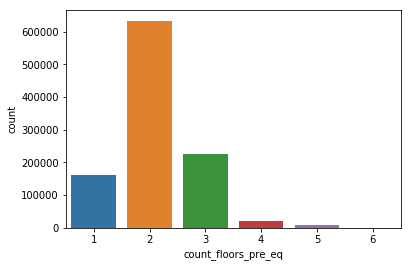

In [16]:
sns.countplot(x=structure.count_floors_pre_eq)

In [17]:
structure.loc[structure.count_floors_post_eq>6,'count_floors_post_eq']=6

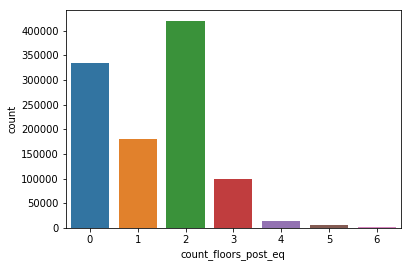

In [18]:
sns.countplot(x=structure.count_floors_post_eq)

In [19]:
#setting count_floor_pre_eq and count_floor_post_eq to be 6

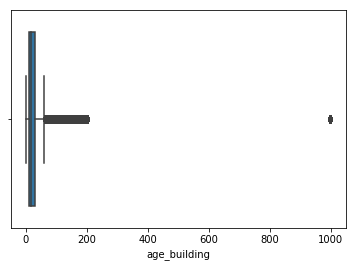

In [20]:
sns.boxplot(x=structure.age_building)

In [21]:
structure.loc[structure.age_building>200,'age_building']=50

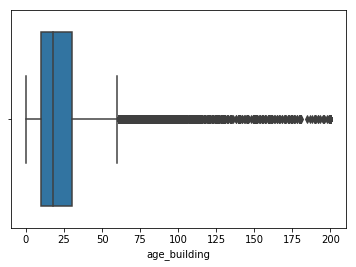

In [22]:
sns.boxplot(x=structure.age_building)

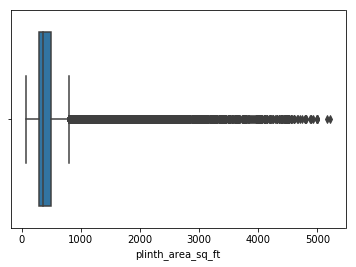

In [23]:
sns.boxplot(x=structure.plinth_area_sq_ft)

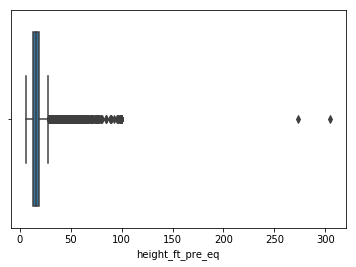

In [24]:
sns.boxplot(x=structure.height_ft_pre_eq)

In [25]:
structure.height_ft_pre_eq.describe()

count    1.052948e+06
mean     1.630841e+01
std      5.808078e+00
min      6.000000e+00
25%      1.300000e+01
50%      1.600000e+01
75%      1.900000e+01
max      3.050000e+02
Name: height_ft_pre_eq, dtype: float64

In [26]:
structure.loc[structure.height_ft_pre_eq>100,'height_ft_pre_eq']=16

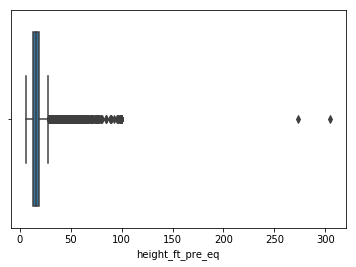

In [27]:
sns.boxplot(x=structure.height_ft_pre_eq)

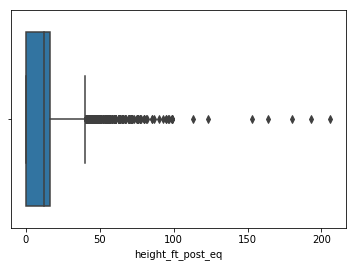

In [28]:
sns.boxplot(x=structure.height_ft_post_eq)

In [29]:
structure.height_ft_post_eq.value_counts()

0      333297
14      86899
18      75945
12      69342
16      69250
15      46597
20      40473
10      37910
8       36219
7       35261
9       31792
13      23726
6       23212
17      23211
21      22001
24      16780
22      14109
11      11895
19       9258
27       8273
30       7966
25       7783
23       3826
28       3809
36       2758
40       2365
32       2346
35       1515
26       1397
45       1025
        ...  
99          5
64          5
67          5
66          4
71          3
80          3
77          3
76          3
85          2
95          2
113         1
93          1
123         1
153         1
164         1
97          1
180         1
96          1
193         1
78          1
90          1
87          1
82          1
81          1
73          1
68          1
61          1
59          1
53          1
206         1
Name: height_ft_post_eq, Length: 89, dtype: int64

In [30]:
structure.loc[structure.height_ft_post_eq>100,'height_ft_post_eq']=12

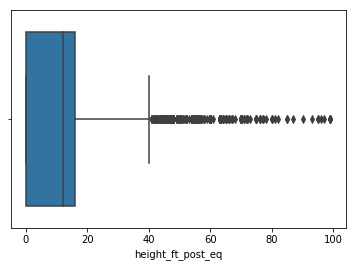

In [31]:
sns.boxplot(x=structure.height_ft_post_eq)

In [32]:
structure.land_surface_condition=LabelEncoder().fit_transform(structure['land_surface_condition'])

In [33]:
structure.land_surface_condition.value_counts()

0    874202
1    144748
2     33998
Name: land_surface_condition, dtype: int64

In [34]:
structure.foundation_type.value_counts()

Mud mortar-Stone/Brick    886331
Bamboo/Timber              60598
Cement-Stone/Brick         57354
RC                         42808
Other                       5857
Name: foundation_type, dtype: int64

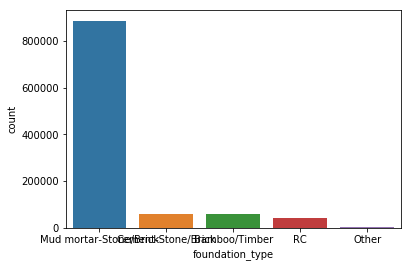

In [35]:
sns.countplot(x=structure.foundation_type)

In [36]:
structure.foundation_type=LabelEncoder().fit_transform(structure['foundation_type'])

In [37]:
structure.foundation_type.value_counts()

2    886331
0     60598
1     57354
4     42808
3      5857
Name: foundation_type, dtype: int64

In [38]:
structure.loc[structure.foundation_type == 3, 'foundation_type'] = np.nan

In [39]:
structure.foundation_type.unique()

array([ 2.,  1.,  0.,  4., nan])

In [40]:
structure['foundation_type']=structure['foundation_type'].ffill()

In [41]:
structure.foundation_type.value_counts()

2.0    889475
0.0     61961
1.0     57962
4.0     43550
Name: foundation_type, dtype: int64

In [42]:
structure.foundation_type=structure.foundation_type.astype(int)

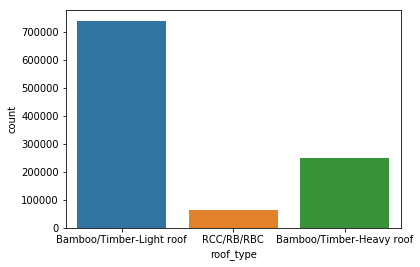

In [43]:
sns.countplot(x=structure.roof_type)

In [44]:
structure.roof_type.unique()

array(['Bamboo/Timber-Light roof', 'RCC/RB/RBC',
       'Bamboo/Timber-Heavy roof'], dtype=object)

In [45]:
structure.roof_type=LabelEncoder().fit_transform(structure['roof_type'])

In [46]:
structure.roof_type.value_counts()

1    739184
0    248235
2     65529
Name: roof_type, dtype: int64

In [47]:
structure.ground_floor_type.value_counts()

Mud            847250
Brick/Stone    100487
RC              99046
Timber           4072
Other            2093
Name: ground_floor_type, dtype: int64

In [48]:
structure.ground_floor_type=LabelEncoder().fit_transform(structure['ground_floor_type'])

In [49]:
structure.ground_floor_type.value_counts()

1    847250
0    100487
3     99046
4      4072
2      2093
Name: ground_floor_type, dtype: int64

In [50]:
structure.loc[structure.ground_floor_type ==4, 'ground_floor_type'] = np.nan

In [51]:
structure.loc[structure.ground_floor_type ==2, 'ground_floor_type'] = np.nan

In [52]:
structure.ground_floor_type.value_counts()

1.0    847250
0.0    100487
3.0     99046
Name: ground_floor_type, dtype: int64

In [53]:
structure['ground_floor_type']=structure['ground_floor_type'].ffill()

In [54]:
structure.other_floor_type.value_counts()
structure.other_floor_type=LabelEncoder().fit_transform(structure['other_floor_type'])

In [55]:
structure.other_floor_type.value_counts()

2    666182
3    177571
0    160301
1     48894
Name: other_floor_type, dtype: int64

In [56]:
structure['position']=structure['position'].fillna('Not attached')

In [57]:
structure.position.describe()

count          1052948
unique               4
top       Not attached
freq            816365
Name: position, dtype: object

In [58]:
structure.position=LabelEncoder().fit_transform(structure['position'])

In [59]:
structure.position.value_counts()

3    816365
0    173459
1     53522
2      9602
Name: position, dtype: int64

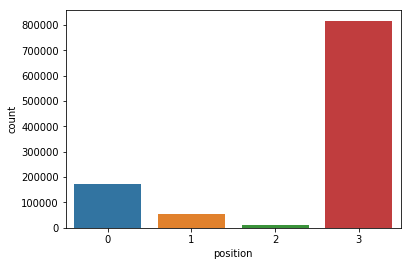

In [60]:
sns.countplot(x=structure.position)

In [61]:
structure.plan_configuration.describe()

count         1052947
unique             10
top       Rectangular
freq          1009987
Name: plan_configuration, dtype: object

In [62]:
structure.plan_configuration=structure.plan_configuration.fillna('Rectangular')

In [63]:
structure.plan_configuration.value_counts()

Rectangular                        1009988
Square                               23106
L-shape                              15088
Multi-projected                       1412
T-shape                               1302
Others                                 994
U-shape                                591
Building with Central Courtyard        203
E-shape                                167
H-shape                                 97
Name: plan_configuration, dtype: int64

In [64]:
structure.plan_configuration=LabelEncoder().fit_transform(structure['plan_configuration'])

In [65]:
structure.plan_configuration.value_counts()

6    1009988
7      23106
3      15088
4       1412
8       1302
5        994
9        591
0        203
1        167
2         97
Name: plan_configuration, dtype: int64

In [66]:
structure.loc[structure.plan_configuration==2,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==1,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==0,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==9,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==5,'plan_configuration']=np.nan
structure.loc[structure.plan_configuration==8,'plan_configuration']=np.nan



In [67]:
structure.plan_configuration.unique()

array([ 6.,  3.,  7., nan,  4.])

In [68]:
structure['plan_configuration']=structure['plan_configuration'].ffill()

In [69]:
structure.plan_configuration.value_counts()

6.0    1012996
7.0      23207
3.0      15313
4.0       1432
Name: plan_configuration, dtype: int64

In [70]:
structure.condition_post_eq.unique()

array(['Damaged-Repaired and used', 'Damaged-Rubble unclear',
       'Damaged-Rubble Clear-New building built', 'Damaged-Not used',
       'Damaged-Rubble clear', 'Damaged-Used in risk', 'Not damaged',
       'Covered by landslide'], dtype=object)

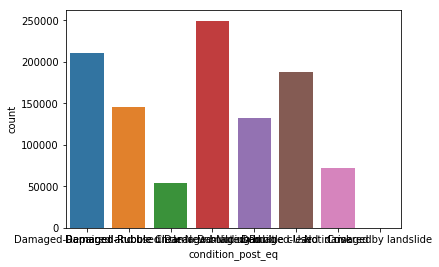

In [71]:
sns.countplot(x=structure.condition_post_eq)

In [72]:
structure.condition_post_eq.value_counts()

Damaged-Not used                           249464
Damaged-Repaired and used                  211119
Damaged-Used in risk                       187480
Damaged-Rubble unclear                     145732
Damaged-Rubble clear                       132508
Not damaged                                 71587
Damaged-Rubble Clear-New building built     54587
Covered by landslide                          471
Name: condition_post_eq, dtype: int64

In [73]:
structure['condition_post_eq']=LabelEncoder().fit_transform(structure['condition_post_eq'])


In [74]:
structure.condition_post_eq.value_counts()

1    249464
2    211119
6    187480
5    145732
4    132508
7     71587
3     54587
0       471
Name: condition_post_eq, dtype: int64

In [75]:
structure.loc[structure.condition_post_eq==0,'condition_post_eq']=np.nan

In [76]:
structure['condition_post_eq']=structure['condition_post_eq'].ffill()

In [77]:
structure.condition_post_eq.value_counts()

1.0    249512
2.0    211174
6.0    187514
5.0    145912
4.0    132624
7.0     71597
3.0     54615
Name: condition_post_eq, dtype: int64

In [78]:
structure.has_superstructure_rc_non_engineered.value_counts()

0    1007979
1      44969
Name: has_superstructure_rc_non_engineered, dtype: int64

In [79]:
structure.has_superstructure_rc_engineered.value_counts()

0    1036167
1      16781
Name: has_superstructure_rc_engineered, dtype: int64

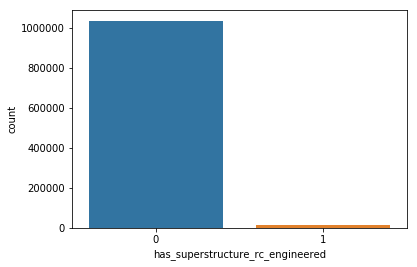

In [80]:
sns.countplot(x=structure.has_superstructure_rc_engineered)

In [81]:
#drop rc engineered

In [82]:
structure.has_superstructure_cement_mortar_brick.value_counts()

0    973777
1     79171
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [83]:
structure=structure.drop('has_superstructure_mud_mortar_brick',axis=1)
structure=structure.drop('has_superstructure_rc_engineered',axis=1)

structure=structure.drop('has_superstructure_cement_mortar_stone',axis=1)

In [84]:
structure.shape

(1052948, 26)

In [85]:
structure.has_superstructure_bamboo.value_counts()

0    964623
1     88325
Name: has_superstructure_bamboo, dtype: int64

In [86]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 26 columns):
building_id                               1052948 non-null object
district_id                               1052948 non-null int64
vdcmun_id                                 1052948 non-null int64
ward_id                                   1052948 non-null int64
count_floors_pre_eq                       1052948 non-null int64
count_floors_post_eq                      1052948 non-null int64
age_building                              1052948 non-null int64
plinth_area_sq_ft                         1052948 non-null int64
height_ft_pre_eq                          1052948 non-null int64
height_ft_post_eq                         1052948 non-null int64
land_surface_condition                    1052948 non-null int64
foundation_type                           1052948 non-null int64
roof_type                                 1052948 non-null int64
ground_floor_type                        

In [87]:
buil_owner.columns.tolist()

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [88]:
buil_owner.legal_ownership_status.value_counts()

Private          1014042
Public             22326
Institutional      10502
Other               6078
Name: legal_ownership_status, dtype: int64

In [89]:
buil_owner['legal_ownership_status']=LabelEncoder().fit_transform(buil_owner['legal_ownership_status'])

In [90]:
buil_owner.legal_ownership_status.value_counts()

2    1014042
3      22326
0      10502
1       6078
Name: legal_ownership_status, dtype: int64

In [91]:
buil_owner.count_families.value_counts()

1.0     913104
0.0      84304
2.0      46246
3.0       7075
4.0       1618
5.0        413
6.0        128
7.0         33
8.0         16
9.0          8
11.0         1
Name: count_families, dtype: int64

In [92]:
buil_owner.loc[buil_owner.count_families >=5, 'count_families'] = np.nan

In [93]:
buil_owner.count_families.value_counts()

1.0    913104
0.0     84304
2.0     46246
3.0      7075
4.0      1618
Name: count_families, dtype: int64

In [94]:
buil_owner['count_families']=buil_owner['count_families'].ffill()

In [95]:
buil_owner['count_families'].value_counts()

1.0    913451
0.0     84363
2.0     46364
3.0      7127
4.0      1643
Name: count_families, dtype: int64

In [96]:
buil_owner['has_secondary_use'].value_counts()

0.0    934839
1.0    118099
Name: has_secondary_use, dtype: int64

In [97]:
buil_owner=buil_owner.drop('has_secondary_use_institution',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_agriculture',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_hotel',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_rental',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_school',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_industry',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_health_post',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_gov_office',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_use_police',axis=1)
buil_owner=buil_owner.drop('has_secondary_use_other',axis=1)

In [98]:
buil_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 7 columns):
building_id               1052948 non-null object
district_id               1052948 non-null int64
vdcmun_id                 1052948 non-null int64
ward_id                   1052948 non-null int64
legal_ownership_status    1052948 non-null int64
count_families            1052948 non-null float64
has_secondary_use         1052938 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 56.2+ MB


In [99]:
buil_owner=buil_owner.drop(['district_id'],axis=1)
buil_owner=buil_owner.drop(['ward_id'],axis=1)
buil_owner=buil_owner.drop(['vdcmun_id'],axis=1)

In [100]:
zzzz=pd.merge(structure,buil_owner,on='building_id')

In [101]:
zzzz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052948 entries, 0 to 1052947
Data columns (total 29 columns):
building_id                               1052948 non-null object
district_id                               1052948 non-null int64
vdcmun_id                                 1052948 non-null int64
ward_id                                   1052948 non-null int64
count_floors_pre_eq                       1052948 non-null int64
count_floors_post_eq                      1052948 non-null int64
age_building                              1052948 non-null int64
plinth_area_sq_ft                         1052948 non-null int64
height_ft_pre_eq                          1052948 non-null int64
height_ft_post_eq                         1052948 non-null int64
land_surface_condition                    1052948 non-null int64
foundation_type                           1052948 non-null int64
roof_type                                 1052948 non-null int64
ground_floor_type                        

In [102]:
zzzz['ground_floor_type']=zzzz['ground_floor_type'].astype(int)
zzzz['plan_configuration']=zzzz['plan_configuration'].astype(int)
zzzz['condition_post_eq']=zzzz['condition_post_eq'].astype(int)
zzzz['count_families']=zzzz['count_families'].astype(int)


In [103]:
zzzz.has_secondary_use=zzzz.has_secondary_use.ffill()

In [104]:
zzzz.has_secondary_use.describe()

count    1.052948e+06
mean     1.121603e-01
std      3.155638e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: has_secondary_use, dtype: float64

In [105]:
zzzz['has_secondary_use']=zzzz['has_secondary_use'].astype(int)

In [106]:
zzzz=zzzz.drop('has_superstructure_other',axis=1)

In [107]:
zzzz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052948 entries, 0 to 1052947
Data columns (total 28 columns):
building_id                               1052948 non-null object
district_id                               1052948 non-null int64
vdcmun_id                                 1052948 non-null int64
ward_id                                   1052948 non-null int64
count_floors_pre_eq                       1052948 non-null int64
count_floors_post_eq                      1052948 non-null int64
age_building                              1052948 non-null int64
plinth_area_sq_ft                         1052948 non-null int64
height_ft_pre_eq                          1052948 non-null int64
height_ft_post_eq                         1052948 non-null int64
land_surface_condition                    1052948 non-null int64
foundation_type                           1052948 non-null int64
roof_type                                 1052948 non-null int64
ground_floor_type                        

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 14 columns):
area_assesed                             631761 non-null object
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null float64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       598344 non-null float64
vdcmun_id                                631761 non-null int64


In [109]:
train.area_assesed.value_counts()

Both                   382992
Building removed       131346
Exterior                99030
Not able to inspect     16575
Interior                 1818
Name: area_assesed, dtype: int64

In [110]:
#Indicates the nature of the damage assessment in terms of the areas of the building that were assessed

In [111]:
train['area_assesed']=LabelEncoder().fit_transform(train.area_assesed)

In [112]:
train.area_assesed.value_counts()

0    382992
1    131346
2     99030
4     16575
3      1818
Name: area_assesed, dtype: int64

In [113]:
zzzz=zzzz.drop(['vdcmun_id'],axis=1)
zzzz=zzzz.drop(['district_id'],axis=1)


In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 14 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null float64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       598344 non-null float64
vdcmun_id                                631761 non-null int64
d

In [115]:
train.has_geotechnical_risk.unique()

array([0., 1.])

In [116]:
train.has_geotechnical_risk=train.has_geotechnical_risk.astype(int)


In [117]:
train.has_geotechnical_risk_other.describe()

count    631761.000000
mean          0.001061
std           0.032548
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_geotechnical_risk_other, dtype: float64

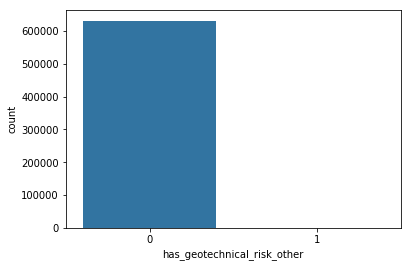

In [118]:
sns.countplot(x=train.has_geotechnical_risk_other)

In [119]:
train.has_geotechnical_risk_other.value_counts()

0    631091
1       670
Name: has_geotechnical_risk_other, dtype: int64

In [120]:
train=train.drop('has_geotechnical_risk_other',axis=1)

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 13 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       598344 non-null float64
vdcmun_id                                631761 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 62.7+ MB


In [122]:
train.has_geotechnical_risk_flood.value_counts()

0    625909
1      5852
Name: has_geotechnical_risk_flood, dtype: int64

In [123]:
#train=train.drop('has_geotechincal_risk_flood',axis=1)

In [124]:
train.has_geotechnical_risk_liquefaction.value_counts()

0    630296
1      1465
Name: has_geotechnical_risk_liquefaction, dtype: int64

In [125]:
#train=train.drop('has_geotechnical_risk_liquefaction',axis=1)

In [126]:
train.has_geotechnical_risk_rock_fall.value_counts()

0    609742
1     22019
Name: has_geotechnical_risk_rock_fall, dtype: int64

In [127]:
train['has_repair_started']=train.has_repair_started.ffill()trian

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 13 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       631761 non-null float64
vdcmun_id                                631761 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 62.7+ MB


In [129]:
train['has_repair_started']=train['has_repair_started'].astype(int)

In [130]:
final=pd.merge(train,zzzz,on='building_id')

In [131]:
test

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701
5,Both,6604e4896c6,7,0.0,0,0,0,0,0,0,0,0.0,701
6,Both,a33b07430f,7,0.0,0,0,0,0,0,0,0,1.0,701
7,Building removed,a33c386cf3,7,0.0,0,0,0,0,0,0,0,1.0,701
8,Both,a33c386ee7,7,0.0,0,0,0,0,0,0,0,1.0,701
9,Both,a33c38700f,7,0.0,0,0,0,0,0,0,0,1.0,701


In [132]:
test.area_assesed=LabelEncoder().fit_transform(test['area_assesed'])

In [133]:
test['has_geotechnical_risk']=test['has_geotechnical_risk'].astype(int)

In [134]:
test['has_repair_started']=test['has_repair_started'].ffill()

In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421175 entries, 0 to 421174
Data columns (total 13 columns):
area_assesed                             421175 non-null int64
building_id                              421175 non-null object
district_id                              421175 non-null int64
has_geotechnical_risk                    421175 non-null int64
has_geotechnical_risk_fault_crack        421175 non-null int64
has_geotechnical_risk_flood              421175 non-null int64
has_geotechnical_risk_land_settlement    421175 non-null int64
has_geotechnical_risk_landslide          421175 non-null int64
has_geotechnical_risk_liquefaction       421175 non-null int64
has_geotechnical_risk_other              421175 non-null int64
has_geotechnical_risk_rock_fall          421175 non-null int64
has_repair_started                       421175 non-null float64
vdcmun_id                                421175 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 41.8+ MB


In [136]:
test.has_repair_started=test.has_repair_started.astype(int)

In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421175 entries, 0 to 421174
Data columns (total 13 columns):
area_assesed                             421175 non-null int64
building_id                              421175 non-null object
district_id                              421175 non-null int64
has_geotechnical_risk                    421175 non-null int64
has_geotechnical_risk_fault_crack        421175 non-null int64
has_geotechnical_risk_flood              421175 non-null int64
has_geotechnical_risk_land_settlement    421175 non-null int64
has_geotechnical_risk_landslide          421175 non-null int64
has_geotechnical_risk_liquefaction       421175 non-null int64
has_geotechnical_risk_other              421175 non-null int64
has_geotechnical_risk_rock_fall          421175 non-null int64
has_repair_started                       421175 non-null int64
vdcmun_id                                421175 non-null int64
dtypes: int64(12), object(1)
memory usage: 41.8+ MB


In [138]:
test.has_geotechnical_risk.value_counts()

0    368505
1     52670
Name: has_geotechnical_risk, dtype: int64

In [139]:
#test=test.drop('has_geotechnical_risk_flood',axis=1)
test=test.drop('has_geotechnical_risk_other',axis=1)
#test=test.drop('has_geotechnical_risk_liquefaction',axis=1)

In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421175 entries, 0 to 421174
Data columns (total 12 columns):
area_assesed                             421175 non-null int64
building_id                              421175 non-null object
district_id                              421175 non-null int64
has_geotechnical_risk                    421175 non-null int64
has_geotechnical_risk_fault_crack        421175 non-null int64
has_geotechnical_risk_flood              421175 non-null int64
has_geotechnical_risk_land_settlement    421175 non-null int64
has_geotechnical_risk_landslide          421175 non-null int64
has_geotechnical_risk_liquefaction       421175 non-null int64
has_geotechnical_risk_rock_fall          421175 non-null int64
has_repair_started                       421175 non-null int64
vdcmun_id                                421175 non-null int64
dtypes: int64(11), object(1)
memory usage: 38.6+ MB


In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 13 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int64
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       631761 non-null int64
vdcmun_id                                631761 non-null int64
dtypes: int64(11), object(2)
memory usage: 62.7+ MB


In [142]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 38 columns):
area_assesed                              631761 non-null int64
building_id                               631761 non-null object
damage_grade                              631761 non-null object
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-nu

In [143]:
fest=final['damage_grade']

In [144]:
testo=pd.merge(test,zzzz,on='building_id')

In [145]:
testo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 37 columns):
area_assesed                              421175 non-null int64
building_id                               421175 non-null object
district_id                               421175 non-null int64
has_geotechnical_risk                     421175 non-null int64
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_flood               421175 non-null int64
has_geotechnical_risk_land_settlement     421175 non-null int64
has_geotechnical_risk_landslide           421175 non-null int64
has_geotechnical_risk_liquefaction        421175 non-null int64
has_geotechnical_risk_rock_fall           421175 non-null int64
has_repair_started                        421175 non-null int64
vdcmun_id                                 421175 non-null int64
ward_id                                   421175 non-null int64
count_floors_pre_eq                       421175 non-nul

In [146]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 38 columns):
area_assesed                              631761 non-null int64
building_id                               631761 non-null object
damage_grade                              631761 non-null object
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-nu

In [147]:
final['damage_grade']=LabelEncoder().fit_transform(final['damage_grade'])

In [148]:
fest=final['damage_grade']

In [149]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 38 columns):
area_assesed                              631761 non-null int64
building_id                               631761 non-null object
damage_grade                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-nul

In [150]:
final.drop('building_id',axis=1)

,area_assesed,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_rock_fall,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,condition_post_eq,legal_ownership_status,count_families,has_secondary_use
0,0,3,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,0
1,0,1,44,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,2,1,1
2,0,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,2,1,0
3,1,4,30,0,0,0,0,0,0,0,...,1,0,0,0,0,0,4,2,1,0
4,0,2,36,0,0,0,0,0,0,0,...,1,0,0,0,0,0,6,2,1,0
5,2,4,21,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5,2,0,0
6,0,1,30,1,0,0,0,1,0,1,...,0,0,0,1,1,0,6,3,1,0
7,0,4,26,0,0,0,0,0,0,0,...,1,0,0,0,0,1,5,2,1,0
8,0,0,21,0,0,0,0,0,0,0,...,0,0,1,0,0,0,7,2,1,0
9,0,2,39,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,2,1,0


In [151]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 38 columns):
area_assesed                              631761 non-null int64
building_id                               631761 non-null object
damage_grade                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-nul

In [152]:
final=final.drop(['building_id'],axis=1)

In [153]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 37 columns):
area_assesed                              631761 non-null int64
damage_grade                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-null int64
count_floors_pre_eq                       631761 non-null

In [154]:
train_X=final
train_Y=fest

In [155]:
test_id=testo.building_id

In [156]:
testo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 37 columns):
area_assesed                              421175 non-null int64
building_id                               421175 non-null object
district_id                               421175 non-null int64
has_geotechnical_risk                     421175 non-null int64
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_flood               421175 non-null int64
has_geotechnical_risk_land_settlement     421175 non-null int64
has_geotechnical_risk_landslide           421175 non-null int64
has_geotechnical_risk_liquefaction        421175 non-null int64
has_geotechnical_risk_rock_fall           421175 non-null int64
has_repair_started                        421175 non-null int64
vdcmun_id                                 421175 non-null int64
ward_id                                   421175 non-null int64
count_floors_pre_eq                       421175 non-nul

In [157]:
testo=testo.drop('building_id',axis=1)

In [158]:
test_X=testo

In [159]:
train_X.shape

(631761, 37)

In [160]:
train_Y.shape

(631761,)

In [161]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 37 columns):
area_assesed                              631761 non-null int64
damage_grade                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-null int64
count_floors_pre_eq                       631761 non-null

In [162]:
train_Y=final['damage_grade']

In [163]:
train_X=final

In [164]:
train.shape

(631761, 13)

In [165]:
testo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 36 columns):
area_assesed                              421175 non-null int64
district_id                               421175 non-null int64
has_geotechnical_risk                     421175 non-null int64
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_flood               421175 non-null int64
has_geotechnical_risk_land_settlement     421175 non-null int64
has_geotechnical_risk_landslide           421175 non-null int64
has_geotechnical_risk_liquefaction        421175 non-null int64
has_geotechnical_risk_rock_fall           421175 non-null int64
has_repair_started                        421175 non-null int64
vdcmun_id                                 421175 non-null int64
ward_id                                   421175 non-null int64
count_floors_pre_eq                       421175 non-null int64
count_floors_post_eq                      421175 non-null

In [166]:
train_X.shape

(631761, 37)

In [167]:
testo.shape

(421175, 36)

In [168]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 37 columns):
area_assesed                              631761 non-null int64
damage_grade                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-null int64
count_floors_pre_eq                       631761 non-null

In [169]:
final=final.drop('damage_grade',axis=1)

In [170]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 36 columns):
area_assesed                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-null int64
count_floors_pre_eq                       631761 non-null int64
count_floors_post_eq                      631761 non-null

In [171]:
train_X=final

In [172]:
train_X=train_X.drop('legal_ownership_status',axis=1)


In [173]:
import lightgbm

In [174]:
test_X=test_X.drop('legal_ownership_status',axis=1)

In [175]:
test_X.shape

(421175, 35)

In [181]:
train_X.shape


(631761, 35)

In [183]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 35 columns):
area_assesed                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int64
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-null int64
count_floors_pre_eq                       631761 non-null int64
count_floors_post_eq                      631761 non-null

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/piyush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/piyush/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
